# Exploring the Weather in Athens

This is the implementation of the first assignment of the first Applied Machine Learning 2021 course. 

---

> Georgios Liargkovas, Undergraduate Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> gliargovas@aueb.gr


## Pre-work

We first import the necessary libraries and specify the way the plots are being displayed.

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Q1: Obtain the Data


We will first begin by optaining the required data of the analysis. 

By visiting the National Oceanic and Atmospheric Administration's National Centers for Environmental Information website, we specify the date range of the dataset **(1955-01-01 to 2021-10-20)**. We also need to provide the type of data we require, which in our case is **Daily Summaries**. Finally, we need to specify our search terms. In our case we will measure the Daily Summaries of Hellinikon weather station, so this is our search term.

The search tool returns us the data from the Hellinikon weather station. The tool also prompts us to specify various other preferences:

* The format of the data: in our case .csv format is selected
* Additional data to include: by reading the assignment description and the documentation, it is noticed that the Average Temperature (TAVG) and Precipitation (PRCP) are required for the analysis and are therefore selected.
* We also selected the option to include data headers in order to facilitate the organization of the data.
* Finally, the metric system is selected as the dataset unit of measurement.

After specifying the above, we download the required dataset. For portability reasons, the data are accessed from a personal access folder.

We also need to download the alternative Athens weather dataset from the Hellenic Data Service, again available in .csv format. 


We then proceed to read the two csv files and create two DataFrames.

By reading the dataset's documentation, we can resolve the contents of each column:

* **DATE** represents the date of the measurement. - (YYYY-MM-DD)
* **STATION** represents the station code, that in out case is the code of the Helinikon weather station.
* **PRCP** represents the precipitation, or the total daily rainfall. - (mm)
* **PRCP_ATTRIBUTES** contain a list of different attributes of the percipitation measurement.
* **TAVG** represents the average daily temperature. - (Degrees Celsius)



In [2]:
noaa_filename = "data/NOAA.csv"
data = pd.read_csv(noaa_filename, 
                   parse_dates=['DATE']) 

We notice that the secondary data file does not contain any headers. Fortunately, with some searching in the dataset's description (although not well documented), it is specified that the dataset columns describe the following:

* col.  1 represents the date of the measurement. - (YYYY-MM-DD)
* cols. 2 - 4 represent the average, maximum and minimum daily temperature (in that order). - (Degrees Celsius)
* cols. 5 - 7 represent the average, maximum and minimum relative humidity. - (%)
* cols. 8 - 10 represent the average, maximum and minimum atmospheric pressure. - (hPa)
* col. 11 represents the total daily rainfall. - (mm) 
* col. 12 represents the average wind speed. - (km/h)
* col. 12 represents the wind direction.
* col. 12 represents the maximum gust of wind speed. - (km/h)

We are careful to name the columns that describe the same measurements with the same name, in order to facilitate further processing. Even though the measurements are from different weather stations of Athens (the secondary data come from a station close to the centre of Athens, whereas the Hellinicon weather station is located in the southern part of Athens), for the purposes of the assignment, we take for granted that this does not affect the results.

We therefore create the headers and assign them manually. 

In [3]:
hds_filename = "data/HDS.csv"

secondary_data_headers = ["DATE", "TAVG", "TMAX", "TMIN", "HAVG", "HMAX", "HMIN", 
                          "PAVG", "PMAX", "PMIN", "PRCP", "WSPD", "WDIR", "GSPD"]

secondary_data = pd.read_csv(hds_filename,
                             names=secondary_data_headers,
                             na_values="---",
                   parse_dates=['DATE'])



* After a careful examination of the csv file, it was also noticed that the missing values of the dataset were marked with **"---"**, which is also specified above.

* After reading the files we are left with the following DataFrames:

In [4]:
data

,STATION,DATE,PRCP,TAVG
0,GR000016716,1955-01-01,0.0,NaN
1,GR000016716,1955-01-02,2.0,NaN
2,GR000016716,1955-01-03,0.0,NaN
3,GR000016716,1955-01-04,0.0,NaN
4,GR000016716,1955-01-05,0.0,NaN
...,...,...,...,...
23246,GR000016716,2020-12-27,0.0,16.6
23247,GR000016716,2020-12-28,6.6,14.8
23248,GR000016716,2020-12-29,0.0,16.3
23249,GR000016716,2020-12-30,0.0,16.4


In [5]:
secondary_data

,DATE,TAVG,TMAX,TMIN,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,PRCP,WSPD,WDIR,GSPD
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


We will now explore the primary dataset. Note that we won't be needing the **STATION** column so we will be dropping it.

In [6]:
data = data.drop(columns="STATION")

In [7]:
data.describe()

,PRCP,TAVG
count,22773.000000,20940.000000
mean,1.011316,18.273873
std,4.633756,6.926203
min,0.000000,-2.000000
25%,0.000000,12.700000
50%,0.000000,17.700000
75%,0.000000,24.300000
max,142.000000,34.800000


In [8]:
data.TAVG.value_counts()

13.9    145
13.1    143
14.2    141
13.3    139
14.9    139
       ... 
34.4      1
1.4       1
2.6       1
32.9      1
33.9      1
Name: TAVG, Length: 346, dtype: int64

In [9]:
data.PRCP.value_counts()

0.0     18910
0.1       226
0.3       225
0.2       215
0.5       165
        ...  
45.6        1
80.9        1
40.4        1
32.7        1
22.6        1
Name: PRCP, Length: 370, dtype: int64

* At a first glance we see that no extreme values do exist.
* It is also worth mentioning that it rained less than 25% of the days, which makes sense in a country such as Greece.

* Now let's explore the any existence of missing values. 

In [10]:
data.isna().sum()

DATE       0
PRCP     478
TAVG    2311
dtype: int64

* We have spotted 2311 missing temperature values and 513 missing precipitation values. This number only includes entry dates contained only in the NOAA dataset.
* That means that there may be more missing values that are just not included at all in the NOAA dataset (we will count them shortly). 
* Those values have to be filled by the secondary dataset.

* We are now going to analyze the secondary dataset. We won't be needing all the data so we only pick the relevant columns.

In [11]:
secondary_data = secondary_data[["DATE", "TAVG", "PRCP"]]

In [12]:
secondary_data.describe()

,TAVG,PRCP
count,3649.000000,3652.000000
mean,19.443245,1.255531
std,7.143639,4.993957
min,0.800000,0.000000
25%,13.700000,0.000000
50%,18.900000,0.000000
75%,25.800000,0.000000
max,35.300000,97.000000


In [13]:
data.TAVG.value_counts()

13.9    145
13.1    143
14.2    141
13.3    139
14.9    139
       ... 
34.4      1
1.4       1
2.6       1
32.9      1
33.9      1
Name: TAVG, Length: 346, dtype: int64

In [14]:
data.PRCP.value_counts()

0.0     18910
0.1       226
0.3       225
0.2       215
0.5       165
        ...  
45.6        1
80.9        1
40.4        1
32.7        1
22.6        1
Name: PRCP, Length: 370, dtype: int64

* We notice similar trends to the first dataset. There is an absence of extreme values, which means that the data do not likely contain flaws.

* Also note that the secondary dataset contains only 3 missing values for the years 2010-2019 so it can be used to fill any missing values from that time period.

In [15]:
secondary_data.isna().sum()

DATE    0
TAVG    3
PRCP    0
dtype: int64

We are now going to fill the missing data from the NOAA dataset by combining the two datasets. The word "fill" implies that if primary data are present, they should not be altered by the secondary (i.e.  calculating the mean of both values). So if both measurements are present, we will only be keeping the data provided in the primary dataset (NOAA). 

* Therefore the combined dataset is created by, firstly, merging the two datasets on the **DATE** column.

In [16]:
combined_data = pd.merge(data, secondary_data, on="DATE", how="outer")
combined_data

,DATE,PRCP_x,TAVG_x,TAVG_y,PRCP_y
0,1955-01-01,0.0,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,NaN,NaN
...,...,...,...,...,...
24099,2017-10-02,NaN,NaN,18.7,0.0
24100,2017-10-08,NaN,NaN,17.8,0.0
24101,2017-10-15,NaN,NaN,20.4,0.0
24102,2017-10-27,NaN,NaN,17.8,0.0


* Now, we will be creating new column containing the combined **PRCP** and **TAVG** values based on the rule described above (i.e. If NOAA dataset value is empty, then it is filled by the secondary dataset value, otherwise only the NOAA value is kept).
* The now unneeded columns are also dropped.

In [17]:
combined_data["PRCP"] = np.where(combined_data.PRCP_x.isna(), combined_data.PRCP_y, combined_data.PRCP_x)
combined_data["TAVG"] = np.where(combined_data.TAVG_x.isna(), combined_data.TAVG_y, combined_data.TAVG_x)

combined_data = combined_data.drop(columns=["TAVG_x", "TAVG_y", "PRCP_x", "PRCP_y"])
combined_data

,DATE,PRCP,TAVG
0,1955-01-01,0.0,NaN
1,1955-01-02,2.0,NaN
2,1955-01-03,0.0,NaN
3,1955-01-04,0.0,NaN
4,1955-01-05,0.0,NaN
...,...,...,...
24099,2017-10-02,0.0,18.7
24100,2017-10-08,0.0,17.8
24101,2017-10-15,0.0,20.4
24102,2017-10-27,0.0,17.8


* Let's see the effectiveness of the process followed above in more detail.
* We will repeat the same process but only with the rows of the secondary dataset (right join instead of full outer join)

In [18]:
only_left_merged_dates = pd.merge(data, secondary_data, on="DATE", how="right")
only_left_merged_dates["PRCP"] = np.where(only_left_merged_dates.PRCP_x.isna(), only_left_merged_dates.PRCP_y, only_left_merged_dates.PRCP_x)
only_left_merged_dates["TAVG"] = np.where(only_left_merged_dates.TAVG_x.isna(), only_left_merged_dates.TAVG_y, only_left_merged_dates.TAVG_x)
only_left_merged_dates.isna().sum()

DATE        0
PRCP_x    955
TAVG_x    853
TAVG_y      3
PRCP_y      0
PRCP        0
TAVG        1
dtype: int64

* From this, we can see that we successfully filled all the PRCP values and all but one of the TAVG falues for the dates ranging from 2010-01-01 to 2019-12-31.
* Therefore this process was indeed effective.

The combined_data DataFrame will be used to answer Q2 - Q5. 
* In order to avoid altering the data by mistake, it will be copied to a new dataset each time. Additionally, we will be adding some utility columns that are used to assist calculations in Q2 - Q5. Those are:
  * The **YEAR** column, which contains the year of the date of each entry.
  * The **DAY** column, which contains the day of year value of the date of each entry.


In [19]:
combined_data["YEAR"] = combined_data.DATE.dt.year
combined_data["DAY"] = combined_data.DATE.dt.dayofyear

<a id="leap_year_cell"></a>
* We can also see that our data contain leap years. We have to deal with them somehow.
* As we know, a leap year contains an extra day on on February, asthe 60th day of year.
* A simple solution proposed [here](https://stackoverflow.com/a/20974207) is to consider all years to be leap years. By this approach, all years will have 366 days. Non-leap years could also have 366 days given that Feb. 29th is left blank (i.e. the 60th day of the year).
* This is what we do below:

In [20]:
combined_data["DAY"] = np.where((~combined_data["DATE"].dt.is_leap_year) & (combined_data["DATE"].dt.dayofyear >= 60), combined_data["DAY"] + 1, combined_data["DAY"])

* We will now sort and reset the dataframe index, to make sure that all the entries are in ascending date order.

In [21]:
combined_data = combined_data.sort_values("DATE")
combined_data = combined_data.reset_index(drop=True)
combined_data

,DATE,PRCP,TAVG,YEAR,DAY
0,1955-01-01,0.0,NaN,1955,1
1,1955-01-02,2.0,NaN,1955,2
2,1955-01-03,0.0,NaN,1955,3
3,1955-01-04,0.0,NaN,1955,4
4,1955-01-05,0.0,NaN,1955,5
...,...,...,...,...,...
24099,2020-12-27,0.0,16.6,2020,362
24100,2020-12-28,6.6,14.8,2020,363
24101,2020-12-29,0.0,16.3,2020,364
24102,2020-12-30,0.0,16.4,2020,365


## Q2 Deviation of Summer Temperatures

* Firstly, we need to calculate the mean summer temperature for every time period. 
* For this reason we will create bins containing the temperatures of every summer.
* This is done by getting only the entries with a month between June (6th month) and August (8th month).


In [22]:
summers = combined_data[combined_data.DATE.dt.month.between(6,8)].copy()

* We are also grouping the entries by year and calculate the yearly summer average of each year.

In [23]:
summer_means = summers.groupby(summers.DATE.dt.year).mean()
summer_means

,PRCP,TAVG,YEAR,DAY
DATE,,,,
1955,0.206522,NaN,1955.0,198.5
1956,0.029348,NaN,1956.0,198.5
1957,0.043478,28.091935,1957.0,198.5
1958,0.033696,27.081522,1958.0,198.5
1959,0.205435,NaN,1959.0,198.5
...,...,...,...,...
2016,0.077174,28.154348,2016.0,198.5
2017,0.470652,28.088043,2017.0,198.5
2018,0.667391,27.436957,2018.0,198.5


Now we will calculate the average summer temperature for the time period of 1974-1999.

* We will first isolate all the entries between 1974 and 1999.
* Then we will calculate their mean.

In [24]:
baseline_temp = summer_means.loc[1974:1999]["TAVG"]
baseline_temp = baseline_temp.mean()
baseline_temp


26.23284980944232

* We now need to calculate the deviation from the above baseline temperature (i.e. difference of yearly mean summer temperature and the baseline temperature).
* The deviation will be introduced to a new column.

In [25]:
summer_means["DEV"] = summer_means["TAVG"] - baseline_temp

* We also need to calculate the rolling average, which is done below.
* The result is also introduced to a new column.
* We also set the min_periods value to 1, in order to calculate the rolling average from the first available year (i.e. 1955).

In [26]:
summer_means["ROLLING"] = summer_means["DEV"].rolling(window=10, min_periods=1).mean()

* We also reset the index for plotting purposes
* In addition, we add another column that will be used to color the plot bars based on their value (positive - negative).

In [27]:
summer_means = summer_means.reset_index()
summer_means["POSITIVE"] = summer_means["DEV"] >= 0

* Below, the two combined  plots are created
* Some axis options are also set, in order to display axis ticks and labels correctly

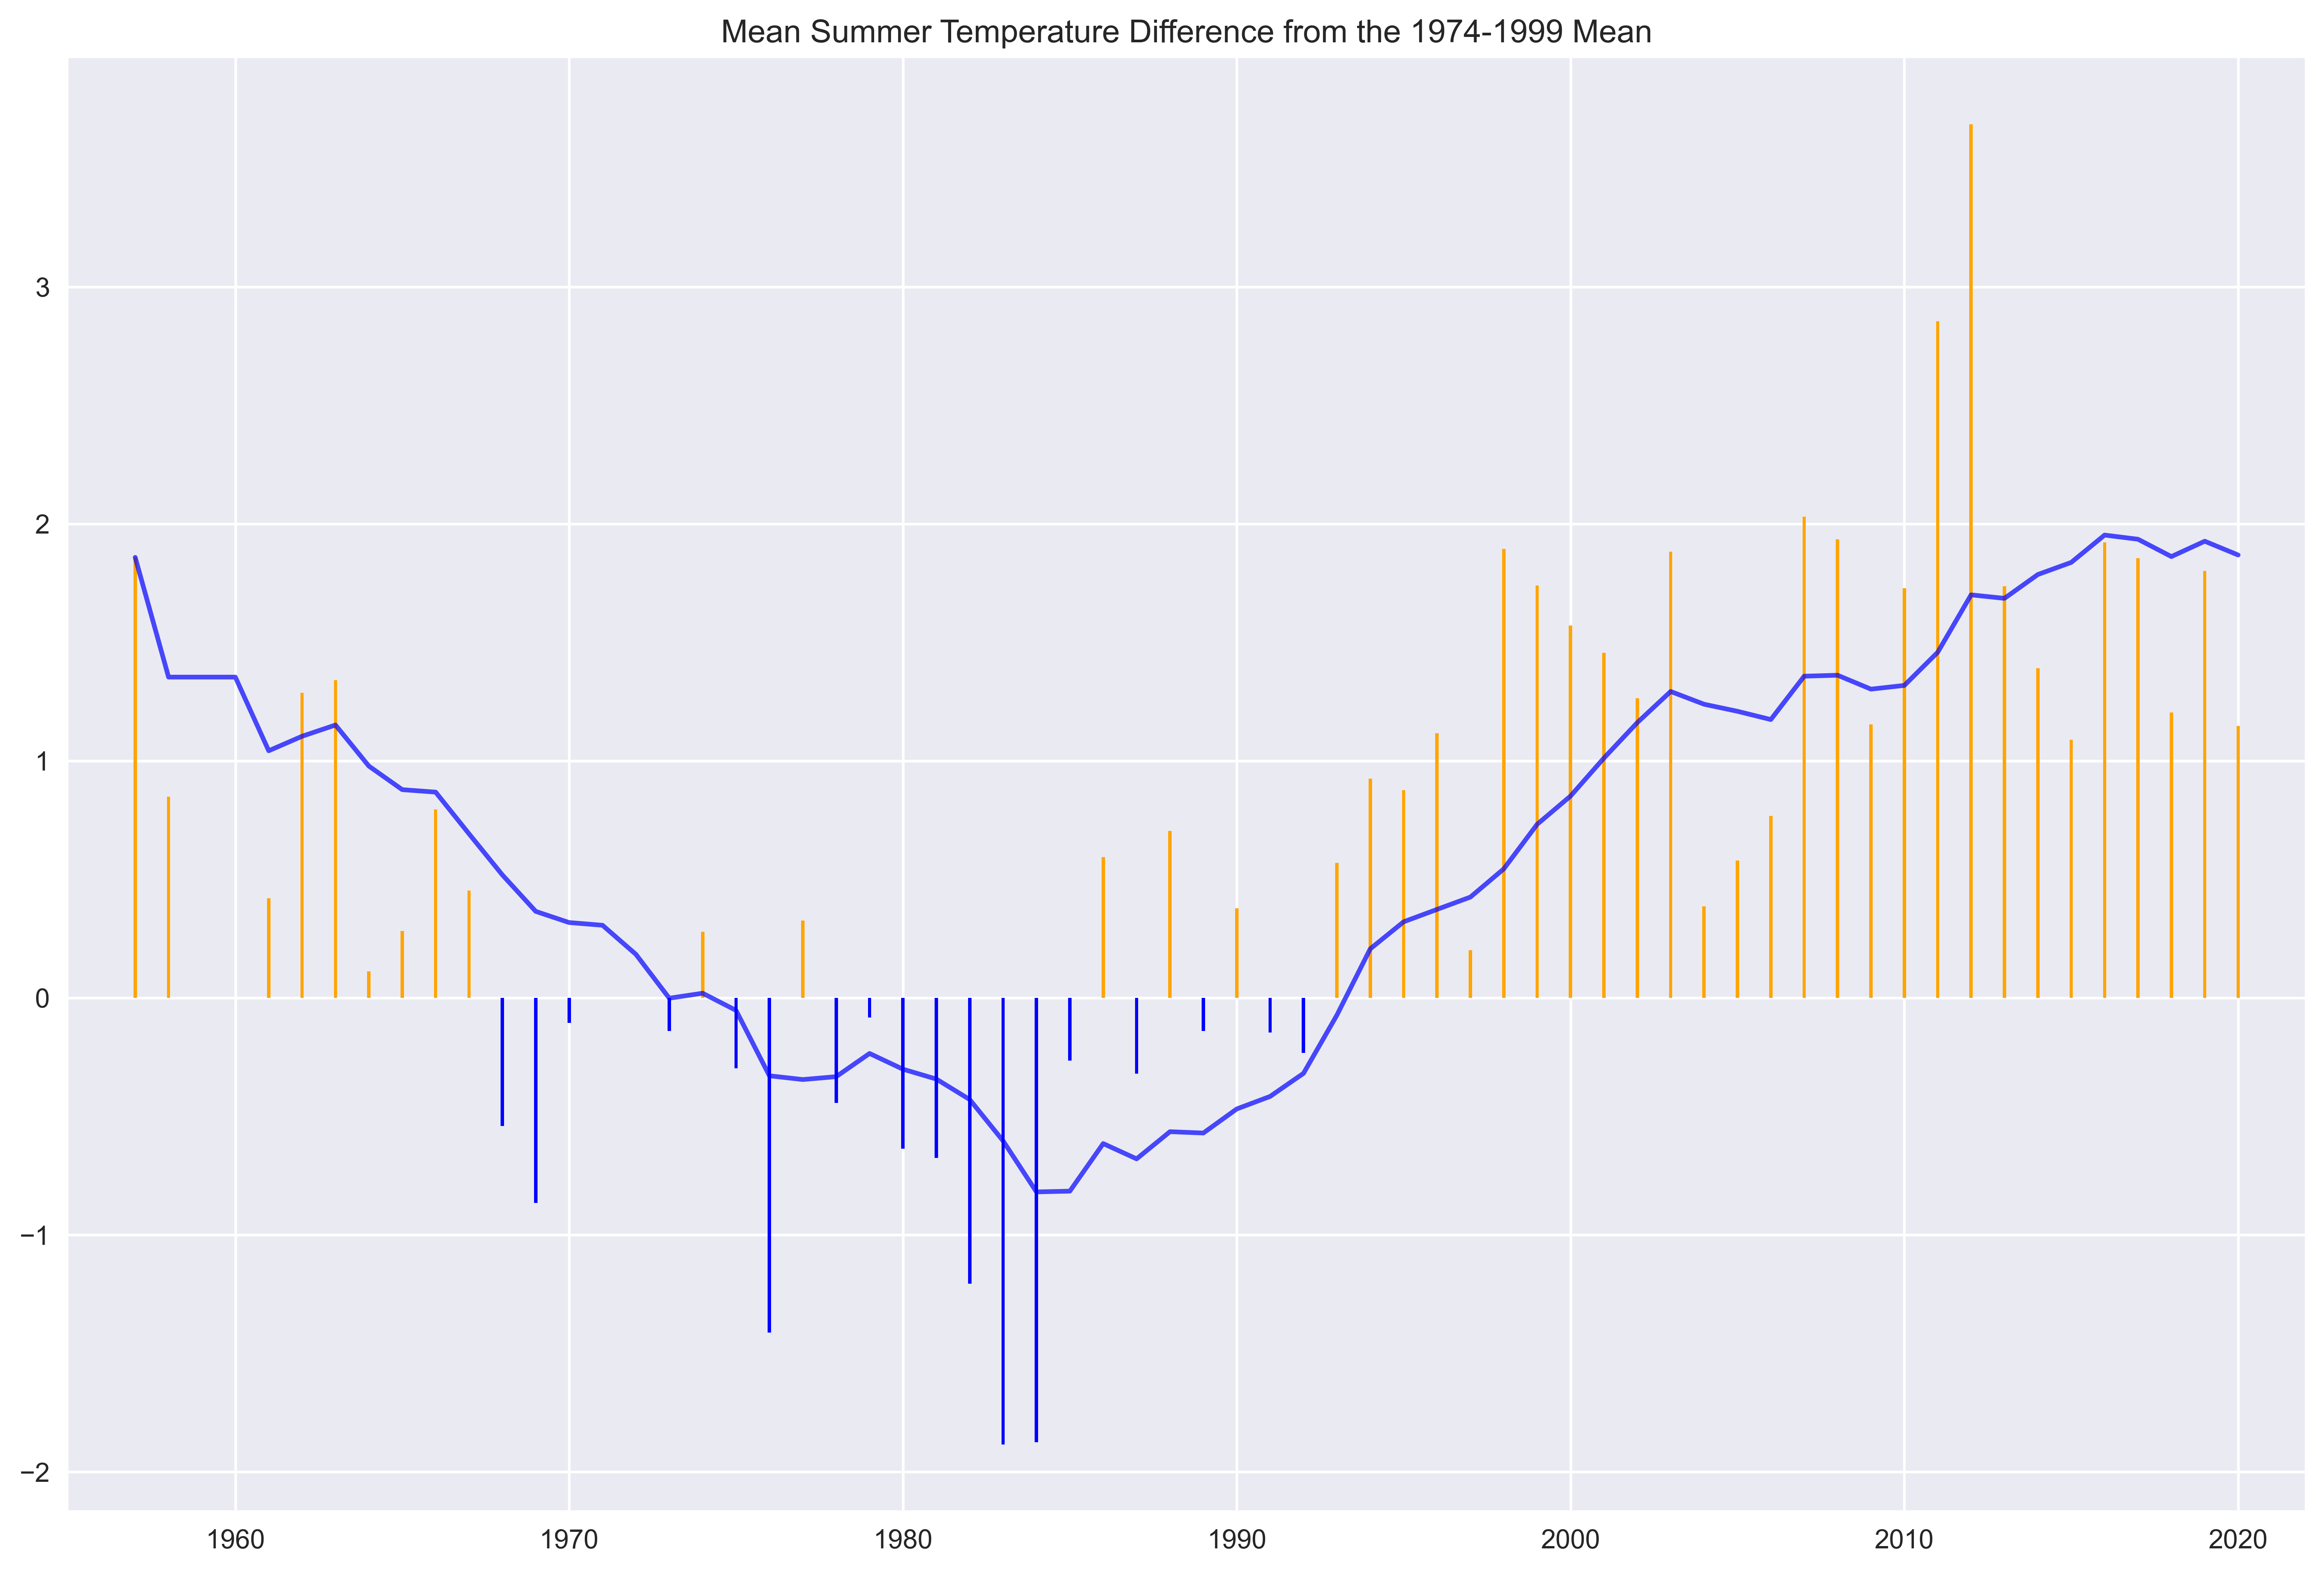

In [28]:
plt.style.use('seaborn')
fig = plt.subplots(figsize=(15, 10))
plt.gcf().set_dpi(500)
ax = summer_means['DEV'].plot(  kind='bar', 
                                color=summer_means.POSITIVE.map(
                                    {True: 'orange', False: 'b'}), 
                                width=0.1)
summer_means['ROLLING'].plot(kind='line', color='b', alpha=0.7)

# Format x-axis ticks and labels
ticks = [x for x in range(5,67,10)]
ax.set_xlim([0, 67])
ax.set_xticks(ticks)
ax.set_xticklabels([x+1955 for x in ticks], rotation=0)

ax.set_title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show()

At a first glance at the figure, we can spot an increasing trend in the average summer temperature starting from the early 1990s. There have also been two summers (2011 and 2012) which the heat is well above the baseline. Recently, though this increasing trend has stopped, as seen by the almost horizontal slope of the rolling average since 2015. However, summer temperatures remain above the 1974-1999 baseline. This could be a sign of the existence of global warnimg. Some could argue that in the early 1960s temperatures were also higher than the baseline so no global warming exists, but this argiment can be refluted by the fact that form 1992, temperatures have not dropped below the baseline, overall yearly deviations are larger and extreme temperature values are also present. 


## Q3: Evolution of Daily Temperatures

* First of all we create a new DataFrame for the purposes of this question.
* We will also be using the **DAY** and **YEAR** columns.
* Finally, we will calculate the rolling average of the temperatures, in a new **ROLLING** column, which will be used instead of the **TAVG** column. This will lead to smoother plot lines.

In [29]:
q3_data=combined_data.copy()
q3_data["ROLLING"] = q3_data.TAVG.rolling(window=30, min_periods=1).mean()
q3_data["MONTH"] = q3_data.DATE.dt.month
q3_data

,DATE,PRCP,TAVG,YEAR,DAY,ROLLING,MONTH
0,1955-01-01,0.0,NaN,1955,1,NaN,1
1,1955-01-02,2.0,NaN,1955,2,NaN,1
2,1955-01-03,0.0,NaN,1955,3,NaN,1
3,1955-01-04,0.0,NaN,1955,4,NaN,1
4,1955-01-05,0.0,NaN,1955,5,NaN,1
...,...,...,...,...,...,...,...
24099,2020-12-27,0.0,16.6,2020,362,14.086667,12
24100,2020-12-28,6.6,14.8,2020,363,14.153333,12
24101,2020-12-29,0.0,16.3,2020,364,14.153333,12
24102,2020-12-30,0.0,16.4,2020,365,14.193333,12


* We now need to express our data in a form that can be easily translated to our target lineplot.
* This can be done by pivoting our dataframe, in order to display the rolling average temperatures based on the day of year (row) for each year (col.).

In [30]:
q3_data = q3_data.pivot_table(index="DAY",columns="YEAR", values="ROLLING")
q3_data

YEAR,1957,1958,1959,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DAY,,,,,,,,,,,,,,,,,,,,,
1,NaN,11.503333,13.034483,12.000000,12.366667,11.560000,13.426667,12.763333,13.756667,12.746667,...,13.093333,12.683333,11.316667,10.473333,12.626667,10.896667,8.996667,11.960000,10.713333,12.340000
2,NaN,11.770000,13.153571,12.100000,12.283333,11.630000,13.430000,12.566667,13.726667,12.493333,...,12.806667,12.560000,11.186667,10.516667,12.116667,10.670000,8.806667,11.806667,10.606667,12.106667
3,NaN,12.020000,13.300000,12.600000,12.320000,11.703333,13.326667,12.453333,13.660000,12.376667,...,12.530000,12.426667,11.216667,10.620000,11.746667,10.600000,8.726667,11.693333,10.446667,11.983333
4,NaN,12.243333,13.453846,12.900000,12.220000,11.920000,13.110000,12.456667,13.630000,12.353333,...,12.410000,12.266667,11.190000,10.676667,11.580000,10.650000,8.730000,11.650000,10.210000,11.960000
5,NaN,12.346667,13.552000,13.380000,12.033333,12.110000,12.800000,12.503333,13.453333,12.236667,...,12.340000,12.020000,11.143333,10.713333,11.223333,10.820000,8.830000,11.710000,10.020000,11.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,10.690000,12.976667,NaN,12.796667,11.580000,14.133333,13.536667,13.873333,13.530000,12.775000,...,13.013333,12.320000,10.783333,14.033333,11.906667,9.983333,12.630000,10.970000,13.910000,14.086667
363,10.636667,12.983333,NaN,12.766667,11.543333,13.956667,13.476667,13.773333,13.260000,12.900000,...,12.966667,12.180000,10.853333,13.990000,11.803333,9.723333,12.676667,10.710000,13.613333,14.153333
364,10.626667,13.086667,NaN,12.770000,11.413333,13.733333,13.276667,13.810000,13.113333,12.927273,...,12.793333,11.943333,10.910000,13.900000,11.703333,9.466667,12.693333,10.733333,13.160000,14.153333


In this wide format, information about each year can be easily elicited.

* We now need to calculate the average temperature for the years 1979-1999.
* We will follow a similar process as above, but instead we will get the mean of the **TAVG** column, before smoothening it out with the calculation of the rolling average.
* This time we will only use entries from the years 1979-1999.

In [31]:
q3_avg = combined_data.copy()
q3_avg = q3_avg[(q3_avg.DATE.dt.year >= 1979) & 
                (q3_avg.DATE.dt.year <= 1999)]

* We will then get the average temperature for each day of year.

In [32]:

q3_avg = q3_avg.groupby(["DAY"])
q3_avg = pd.DataFrame(q3_avg.TAVG.mean())
q3_avg



,TAVG
DAY,
1,10.509524
2,11.004762
3,10.314286
4,9.647619
5,10.314286
...,...
362,9.861905
363,10.361905
364,10.752381


* We will then add another column to the dataframe with the rolling average of the mean daily temperature.

In [33]:
q3_avg["ROLLING"] = q3_avg["TAVG"].rolling( window=30, 
                                            min_periods=1).mean()

* We are then going to plot our daily temperatures along with the average.
* It should be noted that in the axis, the length of February is represented has its leap year length (reference: [here](#leap_year_cell)).

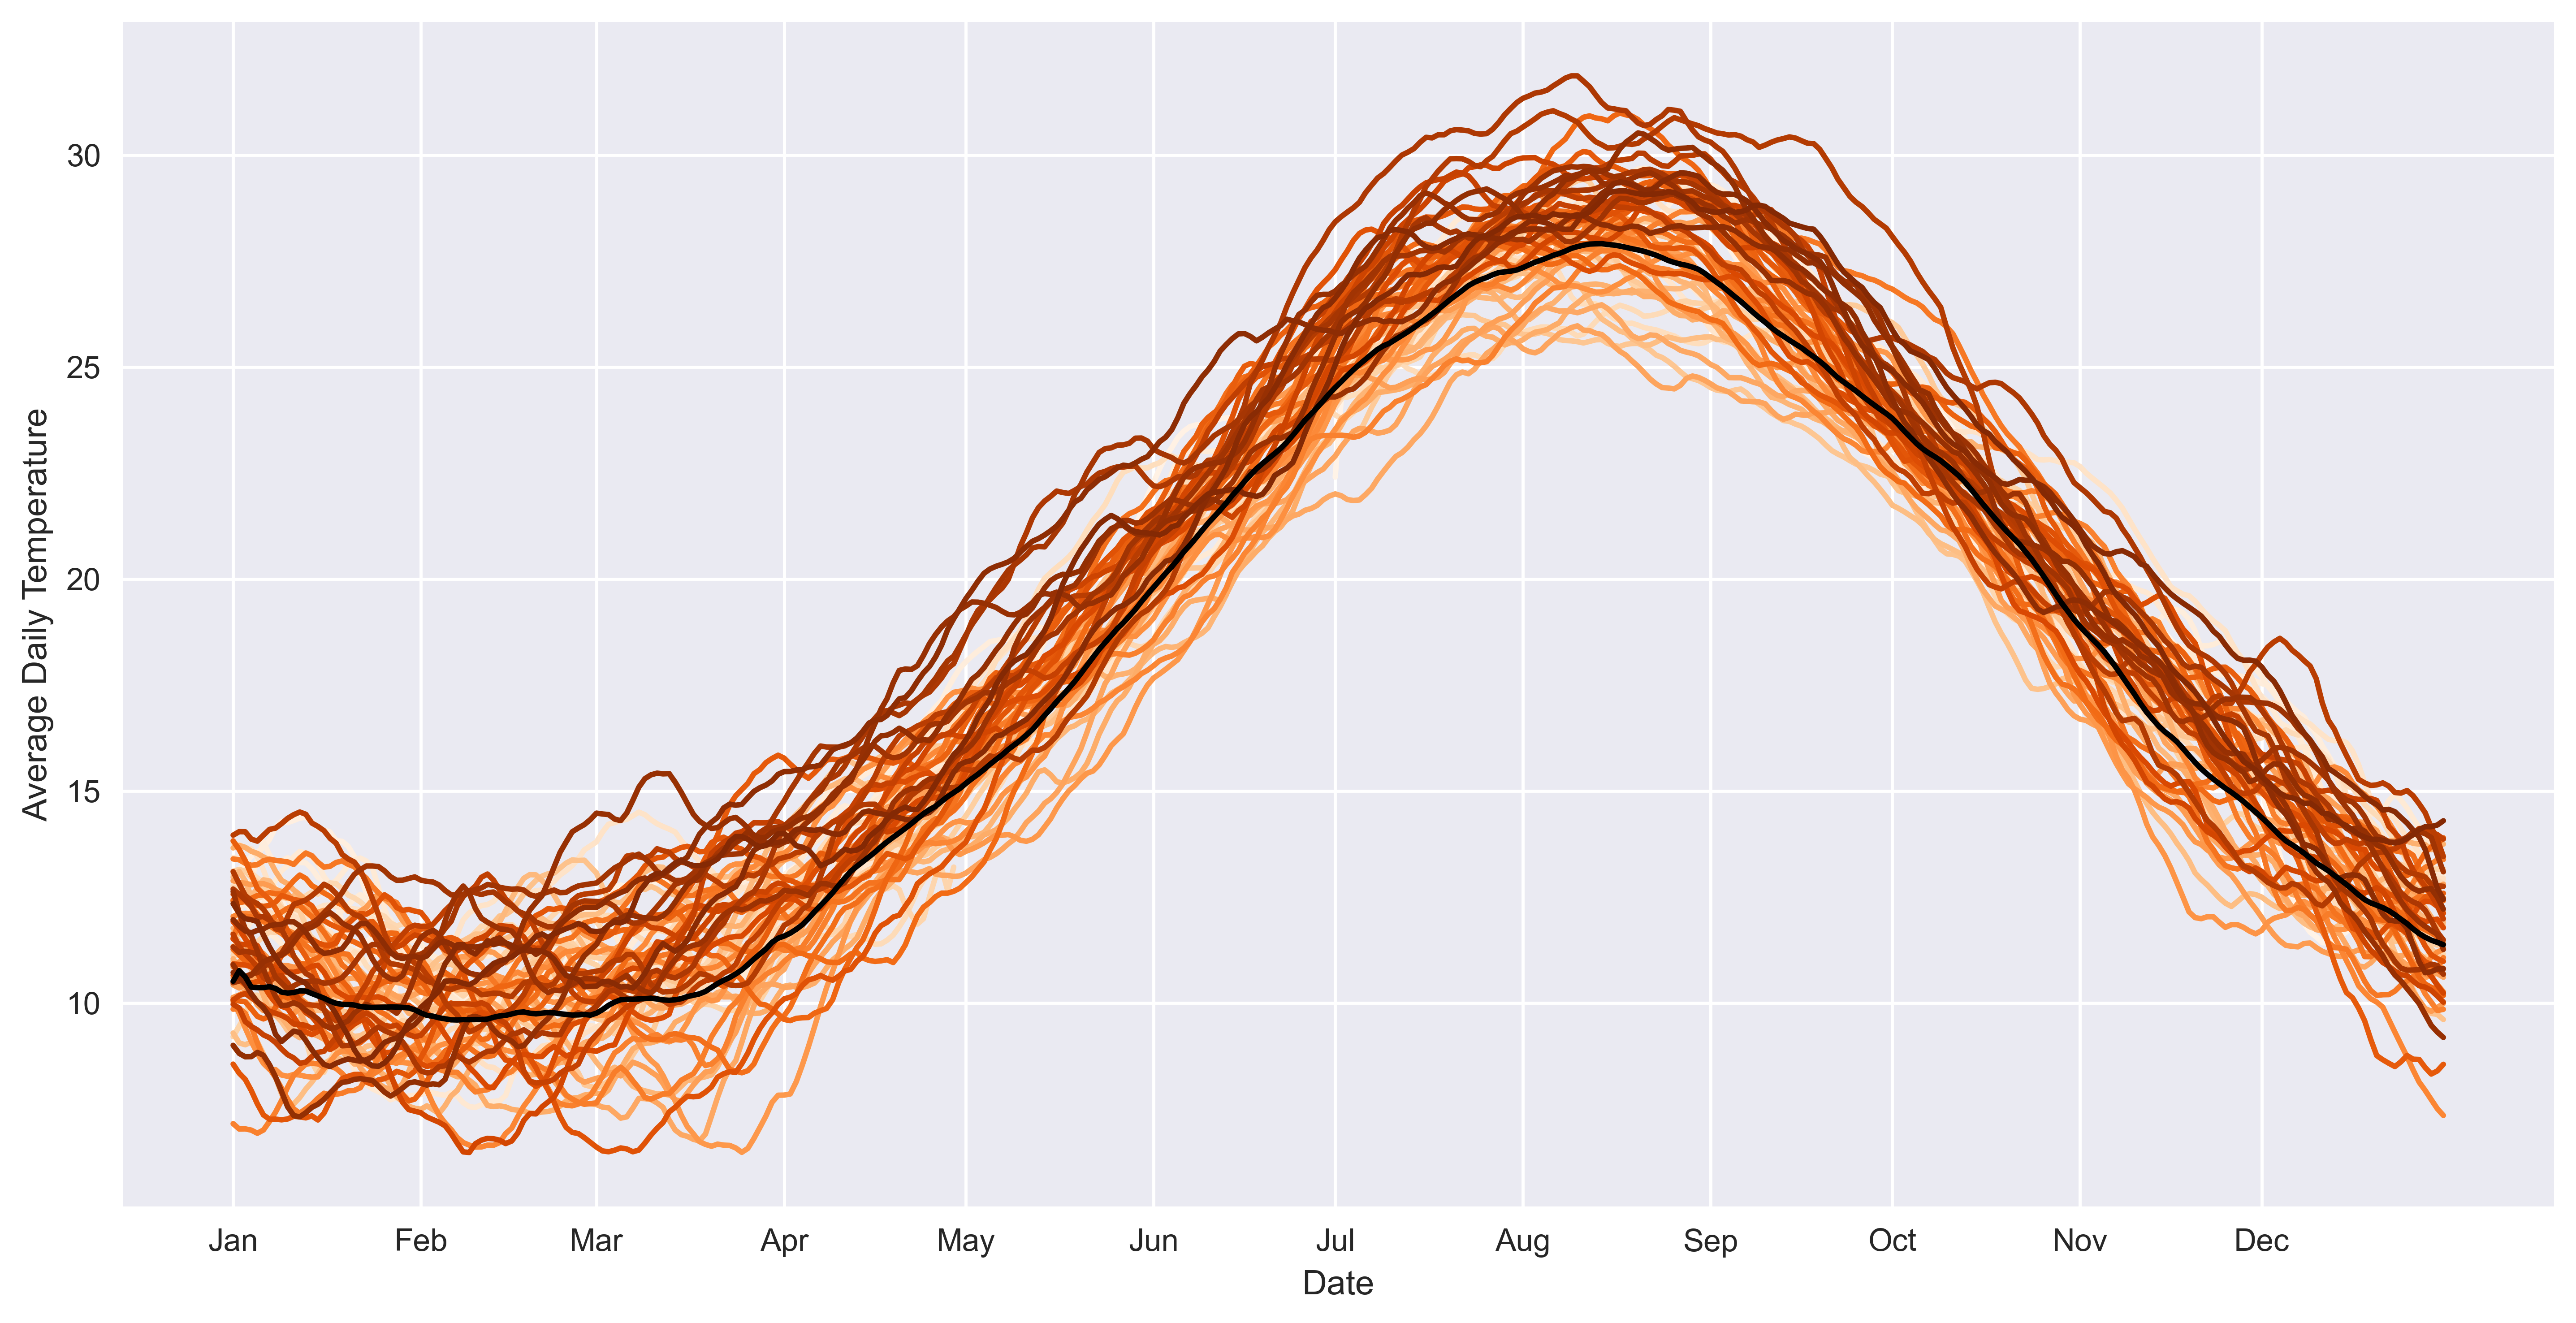

In [34]:
plt.style.use('seaborn')
plt.subplots(figsize=(14, 7))
ax = sns.lineplot(  data = q3_data, 
                    palette="Oranges", 
                    legend=None, 
                    dashes=False)
plt.gcf().set_dpi(500)

sns.lineplot(data=q3_avg["ROLLING"], color="black")

# Set the axis
ax.set(ylabel="Average Daily Temperature", xlabel="Date")
ax.set_xticks([1, 32, 61, 92, 122, 153, 183, 214, 245, 275, 306, 336])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr',
                    'May', 'Jun', 'Jul', 'Aug', 
                    'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

At a first look, we can see the yearly temperature trends. Temperatures follow a similar pattern every year. By splitting the figure into two parts, one below the black baseline mean line, and one above the line, we can see that a notable color difference exists. Lighter colors (earlier years) are concentrated mostly below the black line, wheras darker colors (more recent years) are concentrated mostly above the line. 

This could show an the increase of the average daily temperature, which is a sign of the existence of global warming.

In addition, we can see that between December and January, some darker lines with noteable variance do exist. This could be translated to extreme cold conditions during the recent winters, something that was rarely seen in earlier years.

## Q4: Extreme Temperature Events

* We will once again copy the data from our main DataFrame.
</br>
</br>

* First of all we need to calculate the baseline temperature as a reference to spot extreme temperature events. This should be done for each day.
* For this, we select only the entries between there years.

In [35]:
q4_baseline = combined_data.copy()

q4_baseline = q4_baseline[(q4_baseline.YEAR >= 1974) & (q4_baseline.YEAR <= 1999)]
q4_baseline

,DATE,PRCP,TAVG,YEAR,DAY
6940,1974-01-01,0.0,11.6,1974,1
6941,1974-01-02,0.0,13.7,1974,2
6942,1974-01-03,10.0,12.2,1974,3
6943,1974-01-04,0.0,10.8,1974,4
6944,1974-01-05,0.1,9.6,1974,5
...,...,...,...,...,...
16431,1999-12-27,0.0,15.4,1999,362
16432,1999-12-28,0.0,16.9,1999,363
16433,1999-12-29,0.0,15.1,1999,364
16434,1999-12-30,0.0,13.4,1999,365


* We will then group the **TAVG** values by day, in order to get the baseline temperature reference.
* We will also keep the day of year a a seperate column (**"DOY"**) in order to use it later

In [36]:
q4_baseline = pd.DataFrame(q4_baseline.groupby("DAY").mean()["TAVG"])
q4_baseline = q4_baseline.reset_index()
q4_baseline["DOY"] = q4_baseline["DAY"]
q4_baseline = q4_baseline.drop(columns='DAY')
q4_baseline


,TAVG,DOY
0,10.365385,1
1,10.707692,2
2,10.207692,3
3,9.634615,4
4,9.919231,5
...,...,...
361,9.769231,362
362,10.207692,363
363,10.776923,364
364,11.353846,365


In [37]:
q4 = combined_data.copy()
print(q4)
q4 = q4.pivot_table(index="DAY", columns="YEAR", values="TAVG")
q4["DOY"] = q4.index
q4 = q4.reset_index().drop(columns="DAY")
q4

# new = pd.DataFrame(q3_avg["ROLLING"])
# new = new.reset_index()
# new["DOY"] = new["DAY"]
# new = new.drop(columns="DAY")
# new
# q4 = q4.merge(new, on="DOY").drop(columns="DOY")
q4 = q4.merge(q4_baseline, on="DOY").drop(columns="DOY")

q4.reset_index()
q4
nans = q4.drop(columns="TAVG").isna().sum()
nn = q4.drop(columns="TAVG").copy()
# print(nans)
q4 = q4.iloc[:, :-1].apply(lambda x: np.where(x > 1.1 * q4.TAVG, True, False), axis=0)
# # # q4 = q4.iloc[:, :-1].apply(lambda x: np.where(x > 1.1 * q4.ROLLING, True, False), axis=0)
q4
# print(pd.DataFrame((q4.count() - nans)))
q4 = pd.DataFrame(q4.sum() / (q4.count() - nans))


q4_mean = q4.loc[1974:1999]
q4_mean = float(q4_mean.mean())
q4_mean
q4.columns=(["EV_P"])
q4_avg_line = q4.mean()
q4.mean()

q4["ABOVE_AVG"] = q4["EV_P"] >= float(q4_avg_line)
q4
nn.transpose().loc[1974:1999]

            DATE  PRCP  TAVG  YEAR  DAY
0     1955-01-01   0.0   NaN  1955    1
1     1955-01-02   2.0   NaN  1955    2
2     1955-01-03   0.0   NaN  1955    3
3     1955-01-04   0.0   NaN  1955    4
4     1955-01-05   0.0   NaN  1955    5
...          ...   ...   ...   ...  ...
24099 2020-12-27   0.0  16.6  2020  362
24100 2020-12-28   6.6  14.8  2020  363
24101 2020-12-29   0.0  16.3  2020  364
24102 2020-12-30   0.0  16.4  2020  365
24103 2020-12-31   0.0  15.4  2020  366

[24104 rows x 5 columns]


,0,1,2,3,4,5,6,7,8,9,...,356,357,358,359,360,361,362,363,364,365
1974,11.6,13.7,12.2,10.8,9.6,8.7,9.7,9.7,8.5,9.3,...,10.1,11.1,11.3,11.1,10.2,11.7,11.6,11.6,12.0,12.8
1975,8.7,7.5,7.8,7.2,7.7,8.9,10.9,12.9,7.6,5.8,...,5.1,8.3,10.1,12.3,9.5,7.1,8.7,9.6,9.7,10.8
1976,11.3,12.4,13.6,13.6,8.4,9.5,11.4,10.6,8.7,9.1,...,10.5,9.1,9.1,9.9,10.3,8.2,5.6,7.0,13.4,12.6
1977,10.2,9.1,9.1,7.4,6.2,6.7,6.6,7.3,9.4,10.2,...,8.1,7.6,7.3,9.7,10.2,7.5,7.9,12.1,15.0,14.2
1978,7.0,4.6,6.1,8.9,9.4,4.2,4.4,5.2,2.3,4.9,...,14.2,14.1,10.8,11.1,13.0,12.4,14.0,14.1,14.9,14.4
1979,16.6,14.2,4.4,3.8,15.3,13.4,8.3,3.8,5.1,9.6,...,14.3,14.8,12.9,9.6,7.7,6.2,7.1,8.8,11.7,14.6
1980,10.7,11.3,11.2,4.9,3.3,7.3,10.7,11.1,7.8,9.1,...,13.7,10.1,10.1,11.3,9.8,9.9,11.0,9.3,7.3,7.9
1981,8.0,8.2,6.4,11.8,13.1,6.4,3.7,4.4,2.5,2.1,...,12.3,13.7,13.7,13.9,12.3,9.8,10.0,11.6,14.7,12.9
1982,11.7,14.8,11.3,10.0,10.6,11.8,14.2,7.2,7.6,11.9,...,13.3,14.3,13.8,11.3,10.2,9.3,9.0,8.9,5.3,2.3
1983,1.8,4.7,5.6,7.8,9.8,8.7,8.8,7.5,7.8,8.5,...,12.6,12.5,10.7,11.3,10.9,13.3,12.1,10.4,10.3,7.9


Q4

[5, 15, 25, 35, 45, 55, 65]
[1960, 1970, 1980, 1990, 2000, 2010, 2020]


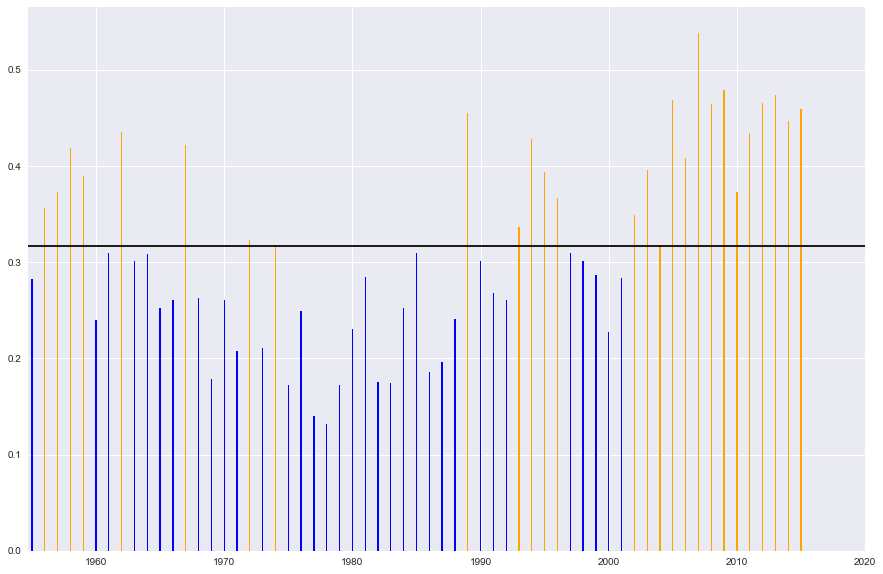

In [38]:
plt.style.use('seaborn')
fig1 = plt.subplots(figsize=(15, 10))

ax1 = q4['EV_P'].plot(kind='bar', color=q4.ABOVE_AVG.map({True: 'orange', False: 'b'}), width=0.1)
ax1.axhline(y=float(q4_avg_line), color='black', linestyle='-')
ticks1 = [x for x in range(5,67,10)]
print(ticks1)
print([x+1955 for x in ticks1])
ax1.set_xticks(ticks1)
ax1.set_xticklabels([x+1955 for x in ticks1], rotation=0)

plt.show()

### Q5: Precipitation

* First of all we will create the DataFrame that will be used to answer this question.
* We won't be needing all the data provided by the general DataFrame, so we only select the relevant columns.
* We will also pivot our dataframe in order to represent our data in a easier-to-process (in our case) wide format. 
* So, we get the daily precipitation data for each year as seen below.

In [41]:
q5 = combined_data[["DATE", "DAY", "YEAR", "PRCP"]].copy()
q5 = q5.pivot(index="DAY", columns="YEAR", values="PRCP")
q5

YEAR,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
DAY,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,8.4,1.4,0.0,0.0,0.0,68.3,0.0
2,2.0,0.0,0.0,0.0,5.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.5,0.0,0.0,0.0,1.5
3,0.0,0.0,0.3,0.0,5.7,5.6,0.0,0.0,0.0,0.0,...,18.8,0.0,0.2,0.0,0.0,2.2,0.0,1.0,0.5,3.3
4,0.0,0.0,4.0,0.0,0.0,23.8,0.0,0.0,0.0,13.4,...,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.3,10.4,0.0
5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,0.0,0.0,0.0,0.0,21.1,0.0,3.4,0.0,18.4,...,0.0,0.2,30.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0
363,1.4,0.0,0.0,0.0,0.0,0.1,0.0,3.1,0.0,0.0,...,0.0,0.2,0.8,0.0,0.0,8.9,0.0,0.0,0.0,6.6
364,0.0,6.3,0.3,0.0,3.6,0.3,0.0,NaN,0.0,0.0,...,0.0,27.2,0.0,1.0,0.0,1.8,11.7,0.0,17.5,0.0


* We create a new DataFrame containing the number of days that rain was spotted in a year as well as the total yearly precipitation. 
* We also add another column with the concentration of the rain, which is the value that concerns us, by dividing the contents of the total and count columns.

In [42]:
yearly_prcp = pd.DataFrame({"TOTAL": q5.sum(), "COUNT": q5[q5 > 0].count()})
yearly_prcp["CONCENTRATION"] = yearly_prcp["TOTAL"] / yearly_prcp["COUNT"]

yearly_prcp["ROLLING_AVG"] = yearly_prcp["CONCENTRATION"].rolling(10, min_periods=1).mean()
yearly_prcp
# yearly_prcp = yearly_prcp.reset_index()
# # PROCESS OK CHECK DATA

,TOTAL,COUNT,CONCENTRATION,ROLLING_AVG
YEAR,,,,
1955,547.0,68,8.044118,8.044118
1956,281.3,52,5.409615,6.726867
1957,303.2,73,4.153425,5.869053
1958,350.0,68,5.147059,5.688554
1959,214.0,62,3.451613,5.241166
...,...,...,...,...
2016,261.6,42,6.228571,6.545994
2017,304.3,48,6.339583,6.623414
2018,380.2,55,6.912727,6.769177


* We also calculate the rolling average of the concentration, in order to smooth out the results.
* As before, we set the min_periods argument to 1, in order to calculate the rolling average from the first day

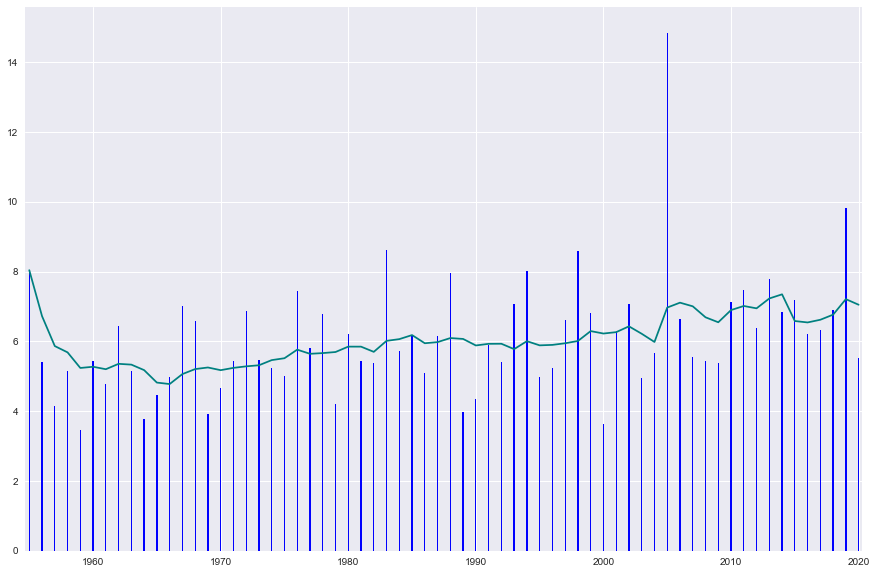

In [40]:
plt.style.use('seaborn')
fig1 = plt.subplots(figsize=(15, 10))

ax = yearly_prcp['ROLLING_AVG'].plot(kind='line', color='teal')
ax = yearly_prcp['CONCENTRATION'].plot(kind='bar', color="b", width=0.1)

# Format x-axis ticks and labels
ticks = [x for x in range(5,67,10)]
ax.set_xticks(ticks)
ax.set_xticklabels([x+1955 for x in ticks], rotation=0)

plt.show()